# Setup

In [3]:
"""
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
"""

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('California_Housing.csv')

# Evaluation

In [49]:
def evaluation(y_test, y_pred):
    # Use the model to make predictions on the testing set
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('R-squared:', r2) # The closer our R-squared score gets to 1 the better the model is trained
    
    # Return the evaluation metrics as a dictionary
    return {'MAE': mae, 'MSE': mse, 'R2': r2}

# Data Preperation

## 1) Get an overview over the dataset

Try to get an overview over your data. Find out with what kind of objects and data types your working with. Are there any missing values and or duplicate entrys? How could you fix these anomalys and improve your dataset?

In [50]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
# Check for duplicats
df.duplicated().sum()

0

In [52]:
# Missing values
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [53]:
# Is there something wrong with our data?
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [54]:
# Data types for columns
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [55]:
# Checking for uniform not numerical values
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## 2) Data cleaning

Try to clean-up your data. Delete all entrys with missing values and try to use only numerical data types in your dataset.

In [56]:
# Drop any rows with missing values
df = df.dropna()

# Convert Strings to usable features
keys = {'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}
df.ocean_proximity = [keys[item] for item in df.ocean_proximity]

## 3) Correlations

Create a plot with all correlations from this dataset. What could this result tell you about the dataset?

Hint: Use the pandas.corr() function and create a heatmap in either seaborn or matplotlib

<Axes: >

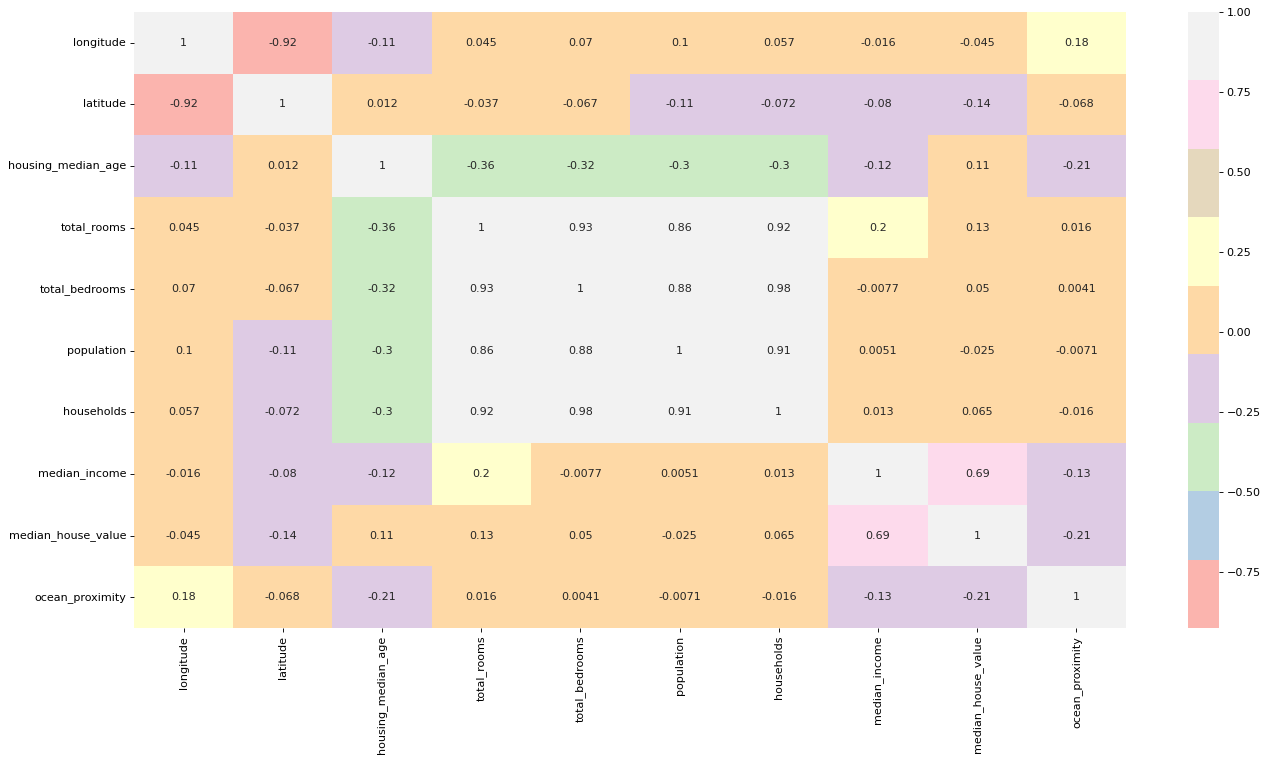

In [57]:
plt.figure(figsize=(20, 10), dpi=80)
sns.heatmap(df.corr(), cmap="Pastel1", annot=True)

## 4) Visualize the data

Create a new scatterplot using matplotlib or seaborn and visualize the entrys on a map. Create different scatterplots for the actuall house prices, average income and the ocean proximity.

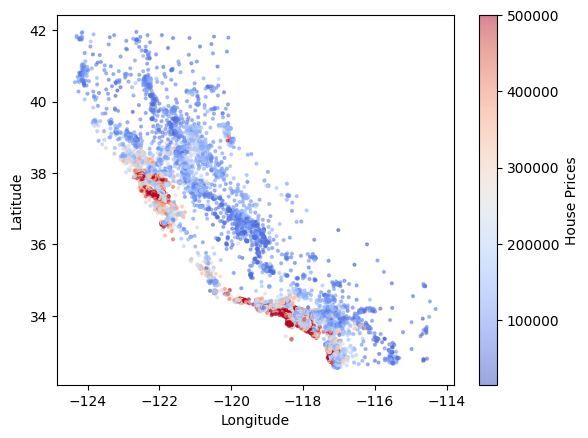

In [58]:
# create a scatter plot of the longitude and latitude
plt.scatter(df['longitude'], df['latitude'], s=4, c=df['median_house_value'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label="House Prices")

# set the x and y axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# display the plot
plt.show()

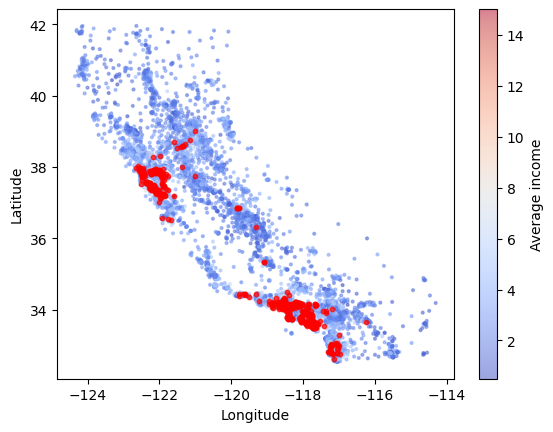

In [65]:
# create a scatter plot of the longitude and latitude
plt.scatter(df['longitude'], df['latitude'], s=4, c=df['median_income'], cmap='coolwarm', alpha=0.5, label='Average Income accross California')
plt.colorbar(label="Average income")

# set the x and y axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# create a boolean array to identify points with median income >= 8
high_income = (df['median_income'] >= 8)

# use the boolean array to create a scatter plot of the high income points with larger alpha and red color
plt.scatter(df[high_income]['longitude'], df[high_income]['latitude'], s=10, c='red', alpha=0.7)

# display the plot
plt.show()

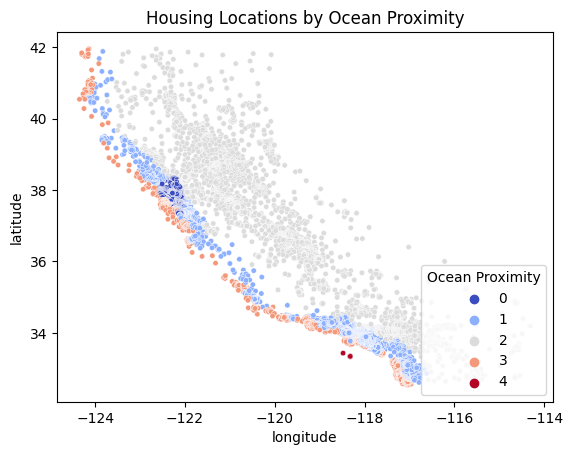

In [60]:
import seaborn as sns

sns.scatterplot(x='longitude', y='latitude', s=15, hue='ocean_proximity', data=df, palette='coolwarm')
plt.title('Housing Locations by Ocean Proximity')
plt.legend(title='Ocean Proximity', loc='lower right')
plt.show()

# Machine Learning Models

In [4]:
# Split the dataset into features and target variable
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split the dataset into training and testing sets. In this case 20% test & 80% training.
# Can this value change the results of your model?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

## Decision Tree

Mean Absolute Error: 54086.0753284829
Mean Squared Error: 5633023538.311623
R-squared: 0.5880841630950586


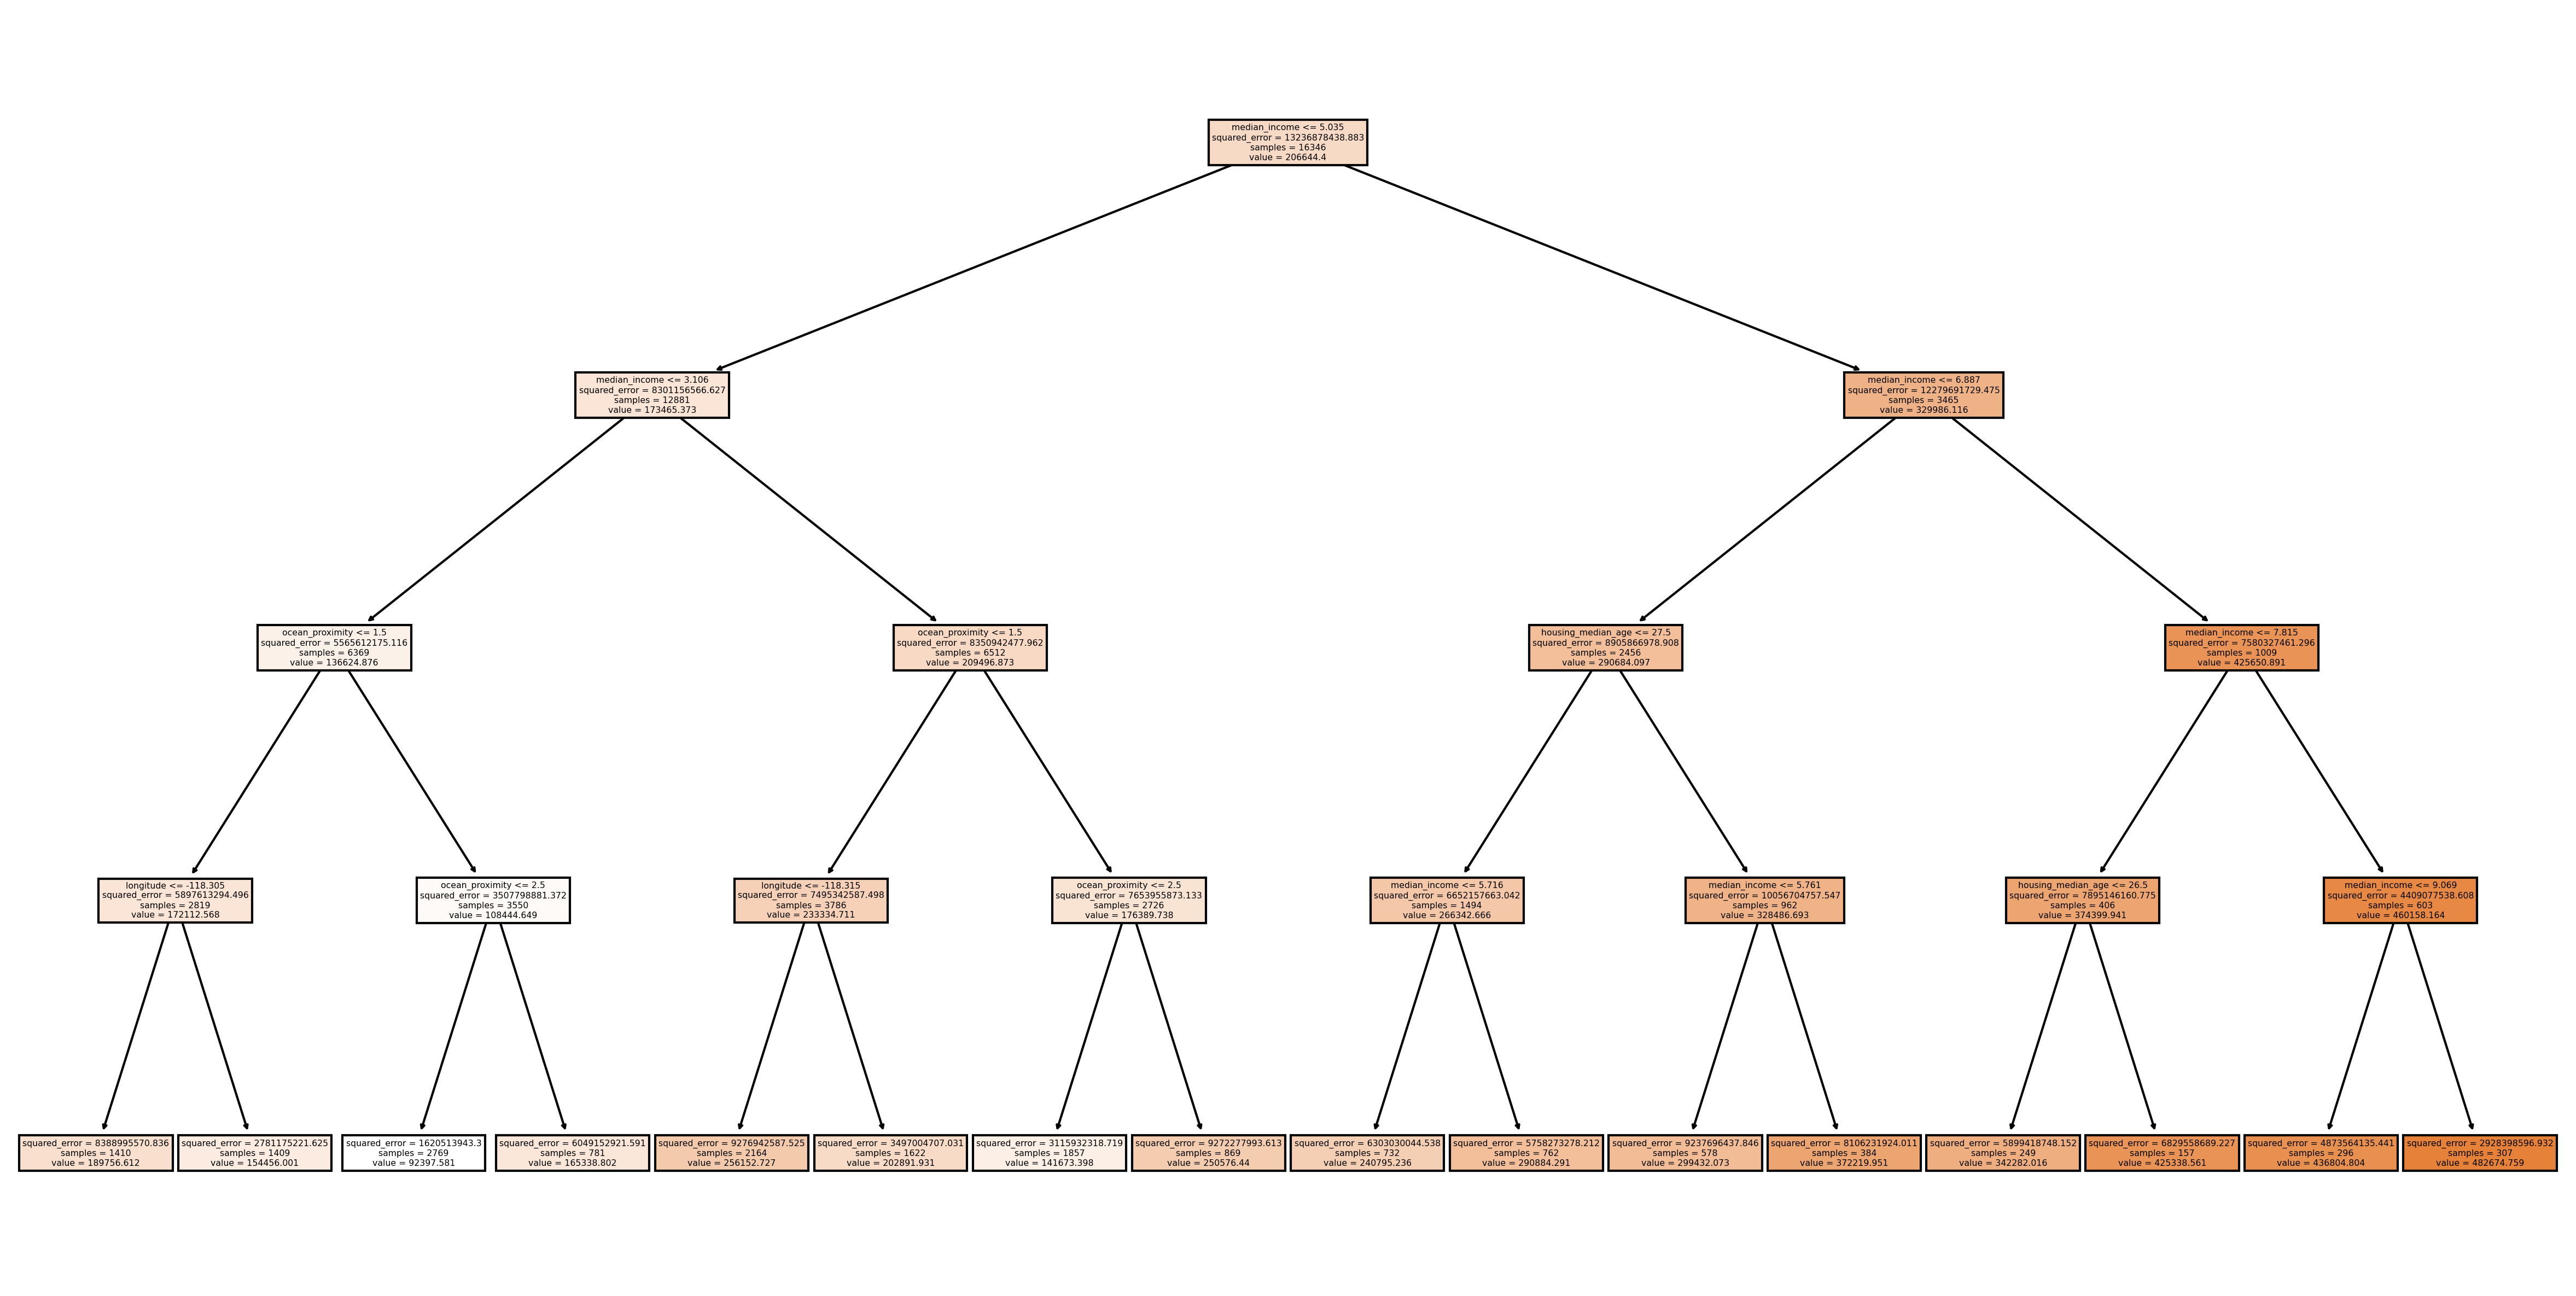

In [62]:
# Create the Decision Tree model
dt = DecisionTreeRegressor(max_depth=4, random_state=42)

# Train the model on the training set
dt.fit(X_train, y_train)

# Predictions 
y_pred_dt = dt.predict(X_test)

# Evaluate the model
evaluation(y_test, y_pred_dt)

# Visualize the decision tree
plt.figure(figsize=(20,10), dpi=300)
plot_tree(dt, filled=True, feature_names=list(X.columns))
plt.savefig('decision_tree.png', dpi=300)
plt.show()

## Linear Regression

Mean Absolute Error: 51366.75455356398
Mean Squared Error: 4915187970.742738
R-squared: 0.6405760152174974


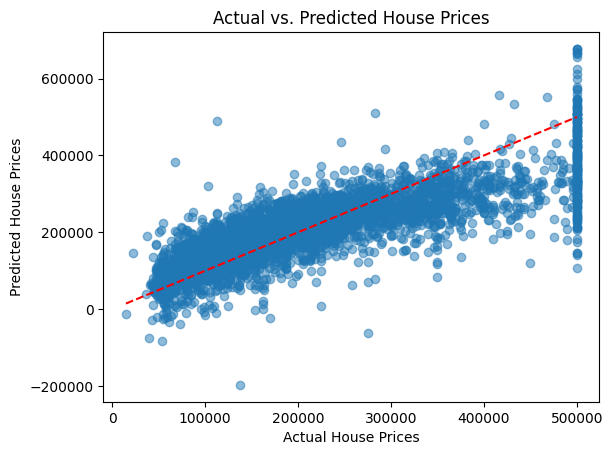

In [63]:
# Create the Linear Regression model
lr = LinearRegression()

# Train the model on the training set
lr.fit(X_train, y_train)

# Predictions 
y_pred_lr = lr.predict(X_test)

# Evaluate the model
evaluation(y_test, y_pred_lr)

# Visualize the predicted prices versus the actual prices
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot(np.linspace(np.min(y_test), np.max(y_test)), np.linspace(np.min(y_test), np.max(y_test)), '--r')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()